In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import os
os.chdir("..")

In [14]:
print(os.getcwd())
print(os.listdir())

c:\Users\madri\OneDrive\Desktop
['01 title.lnk', '02 k song.lnk', '03 AUDIO.lnk', 'ArmouryCrateInstallTool.lnk', 'Armoury_Crate_Uninstall_Tool.lnk', 'AUDIO.lnk', 'BANK', 'BK DIGITAL.lnk', 'Captures.lnk', 'con 1.lnk', 'desktop.ini', 'Desktop.lnk', 'Downloads.lnk', 'excel af', 'gurushiksha (2).lnk', 'gurushiksha.jpg', 'GURUSHIKSHA.lnk', 'jpserver-17596-open.lnk', 'jupyter-lsp-notebook.json.lnk', 'Mahavatar Narsimha.lnk', 'Manjunath - Chrome.lnk', 'mini report (2).lnk', 'mini report.lnk', 'MovieBox.apk.lnk', 'Music.lnk', 'Pictures.lnk', 'sales_data_analysis', 'Shortcut to Desktop (OneDrive - Personal).lnk', 'SQL', 'Telegram Desktop.lnk', 'TITLE.lnk', 'Turbo.C.3.2.lnk', 'Videos.lnk', 'Visual Studio Code.lnk', '[MS] Su From So (2025) Kannada HDRip 1080p.lnk', '_Elumale_2025_Kannada_1080p_HDTC\xa0_10bit_x265_HEVC_HC_ESub_VK.lnk']


In [16]:
import os
os.chdir(r"C:\Users\madri\OneDrive\Desktop\sales_data_analysis")
print(os.getcwd())

C:\Users\madri\OneDrive\Desktop\sales_data_analysis


In [17]:
print(os.listdir("data"))

['sales_data.csv']


In [18]:
import pandas as pd

df = pd.read_csv("data/sales_data.csv")
df.head()

,Date,Region,Product,Sales
0,2024-02-21,North,Tablet,156
1,2024-03-12,North,Laptop,664
2,2024-03-23,East,Tablet,508
3,2024-03-28,North,Headphones,921
4,2024-01-24,East,Phone,358


In [7]:
df.tail()

,Date,Region,Product,Sales
495,2024-02-19,South,Phone,194
496,2024-03-28,East,Headphones,788
497,2024-01-13,West,Laptop,138
498,2024-03-13,West,Phone,406
499,2024-01-11,North,Headphones,372


In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Date     500 non-null    str  
 1   Region   500 non-null    str  
 2   Product  500 non-null    str  
 3   Sales    500 non-null    int64
dtypes: int64(1), str(3)
memory usage: 15.8 KB


In [10]:
df.describe()

,Sales
count,500.000000
mean,523.012000
std,273.514717
min,55.000000
25%,283.500000
50%,540.000000
75%,759.250000
max,995.000000


In [12]:
# Check for missing values
df.isnull().sum()

Date       0
Region     0
Product    0
Sales      0
dtype: int64

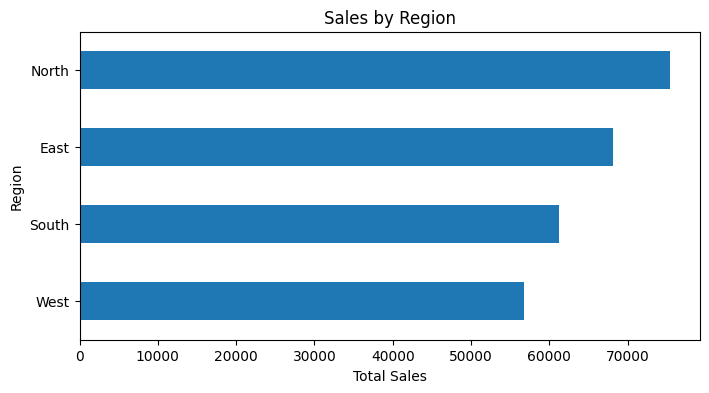

In [13]:
# Sales by Region
region_sales = df.groupby("Region")["Sales"].sum().sort_values()

region_sales.plot(kind="barh", figsize=(8,4))
plt.title("Sales by Region")
plt.xlabel("Total Sales")
plt.show()

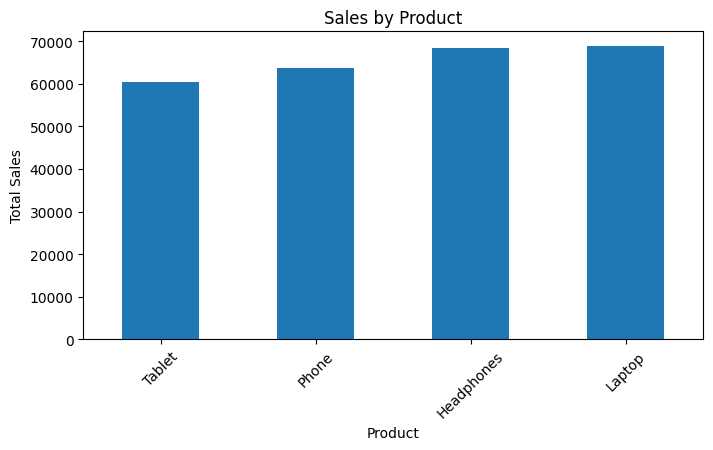

In [15]:
# Sales by Product
product_sales = df.groupby("Product")["Sales"].sum().sort_values()

product_sales.plot(kind="bar", figsize=(8,4))
plt.title("Sales by Product")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

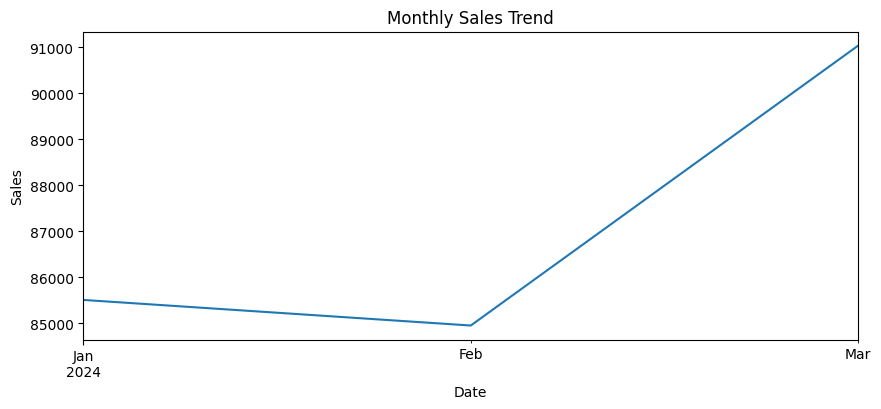

In [16]:
# Monthly Trend
df["Date"] = pd.to_datetime(df["Date"])

monthly = df.groupby(df["Date"].dt.to_period("M"))["Sales"].sum()

monthly.plot(figsize=(10,4))
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()

In [21]:
# Highest revenue region
top_region = df.groupby("Region")["Sales"].sum().idxmax()

# Best selling product
top_product = df.groupby("Product")["Sales"].sum().idxmax()

# Peak sales month
df["Month"] = df["Date"].dt.to_period("M")
peak_month = df.groupby("Month")["Sales"].sum().idxmax()

print("Highest revenue region:", top_region)
print("Best selling product:", top_product)
print("Peak sales month:", peak_month)

Highest revenue region: North
Best selling product: Laptop
Peak sales month: 2024-03


In [8]:
# Sales Growth Rate (Month-over-Month)

# Shows whether business is growing or declining.

df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.to_period("M")

monthly_sales = df.groupby("Month")["Sales"].sum()

growth_rate = monthly_sales.pct_change() * 100
print("Monthly Growth %:\n", growth_rate)


Monthly Growth %:
 Month
2024-01         NaN
2024-02   -0.650201
2024-03    7.159000
Freq: M, Name: Sales, dtype: float64


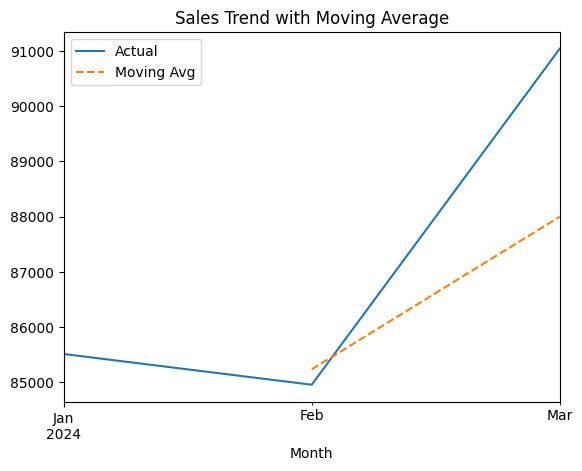

In [ ]:
# 2. Moving Average Trend (Professional Analysis)
# Smooths data to see real trend.

moving_avg = monthly_sales.rolling(window=2).mean()

monthly_sales.plot(label="Actual")
moving_avg.plot(label="Moving Avg", linestyle="--")

plt.legend()
plt.title("Sales Trend with Moving Average")
plt.show()

Product
Laptop        68883
Headphones    68475
Phone         63719
Tablet        60429
Name: Sales, dtype: int64


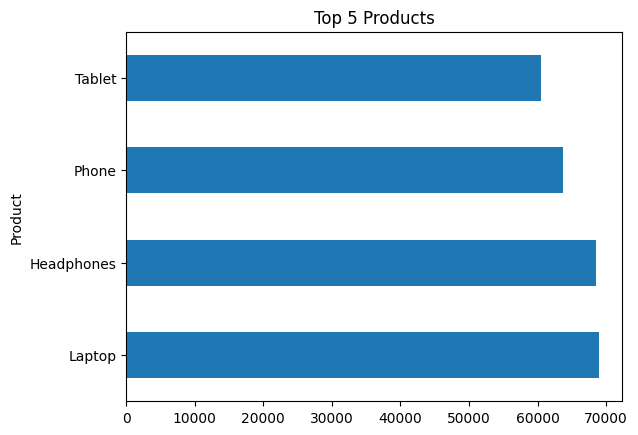

In [19]:
# Top 5 Products
top_products = df.groupby("Product")["Sales"].sum().nlargest(5)

print(top_products)

top_products.plot(kind="barh", title="Top 5 Products")
plt.show()

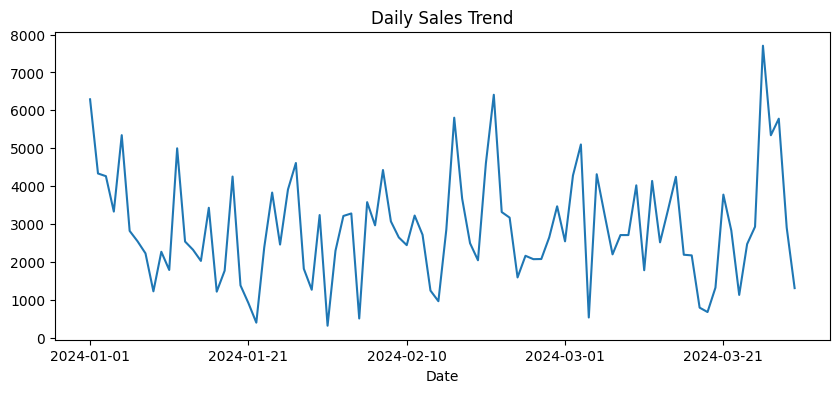

In [20]:
# Daily Sales Trend
daily_sales = df.groupby("Date")["Sales"].sum()

daily_sales.plot(figsize=(10,4), title="Daily Sales Trend")
plt.show()